In [1]:
pip install --upgrade keras

  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


# Clonamos el repositorio para obtener el dataset

In [2]:
!git clone https://github.com/joanby/deeplearning-az.git

Cloning into 'deeplearning-az'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 10147 (delta 22), reused 35 (delta 15), pack-reused 10096
Receiving objects: 100% (10147/10147), 236.93 MiB | 24.77 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Checking out files: 100% (10107/10107), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Parte 1 - Preprocesado de los datos

# Importación de las librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar el dataset de entrenamiento

In [5]:
dataset_train = pd.read_csv("/content/deeplearning-az/datasets/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Train.csv")
training_set  = dataset_train.iloc[:, 1:2].values

# Escalado de características

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Crear una estructura de datos con 60 timesteps y 1 salida

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Redimensión de los datos

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Parte 2 - Construcción de la RNR

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

# Añadir la primera capa de LSTM y la regulariación por Dropout

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

# Añadir la segunda capa de LSTM y la regulariación por Dropout

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

# Añadir la tercera capa de LSTM y la regulariación por Dropout

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

# Añadir la cuarta capa de LSTM y la regulariación por Dropout


In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Añadir la capa de salida

In [15]:
regressor.add(Dense(units = 1))

# Compilar la RNR
# Como va a ser entrenada?

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustar la RNR al conjunto de entrenamiento

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0498
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

# Parte 3 - Ajustar las predicciones y visualizar los resultados

# Obtener el valor de las acciones reales  de Enero de 2017

In [18]:
dataset_test = pd.read_csv('/content/deeplearning-az/datasets/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


# Obtener la predicción de la acción con la RNR para Enero de 2017

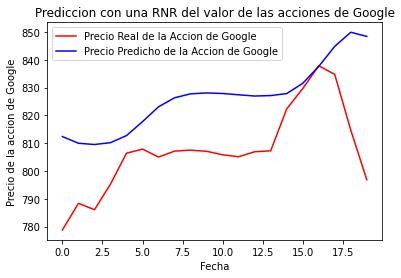

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la Accion de Google')
plt.title("Prediccion con una RNR del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()

